# NAME - ASWIN RAJ
# REG NO - 20MID0009
# CAMPUS - VIT VELLORE

**2. Load the dataset into the tool**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [17]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


**3. Perform Below Visualizations.**

** Univariate Analysis**

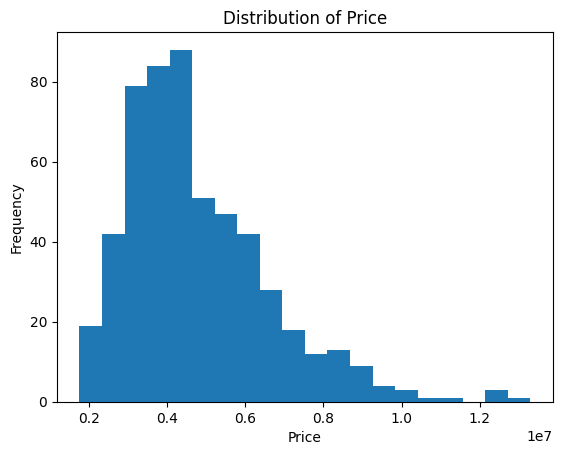

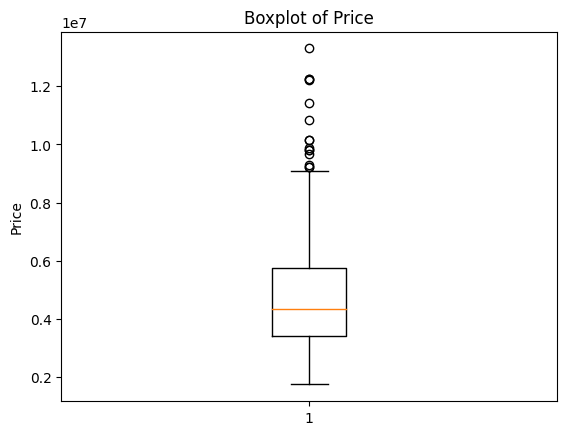

In [18]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Boxplot of Price')
plt.show()

** Bi-Variate Analysis**

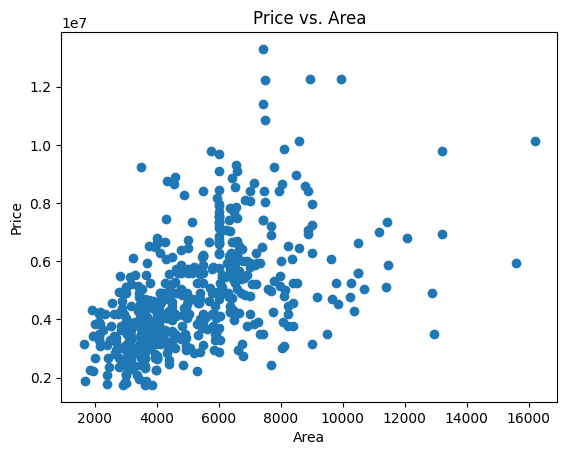

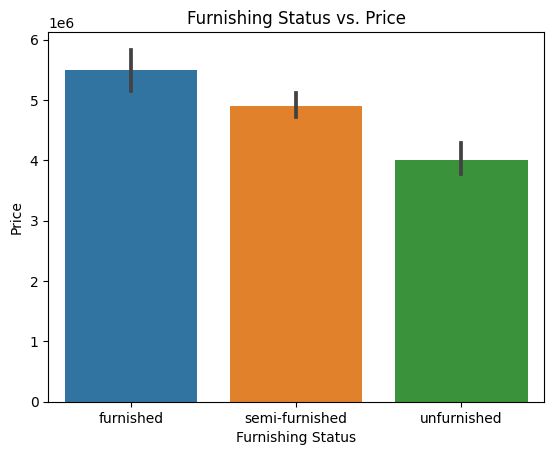

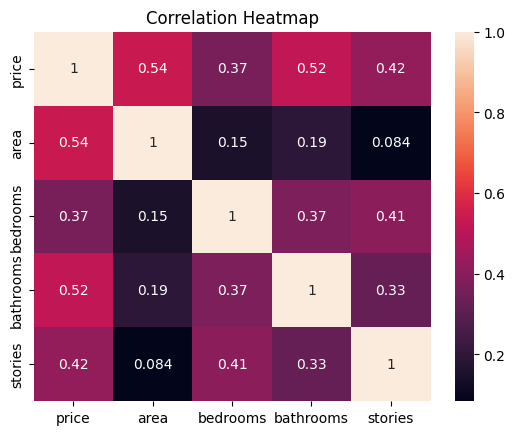

In [19]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
plt.show()
sns.barplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Furnishing Status vs. Price')
plt.show()
corr = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


** Multi-Variate Analysis**

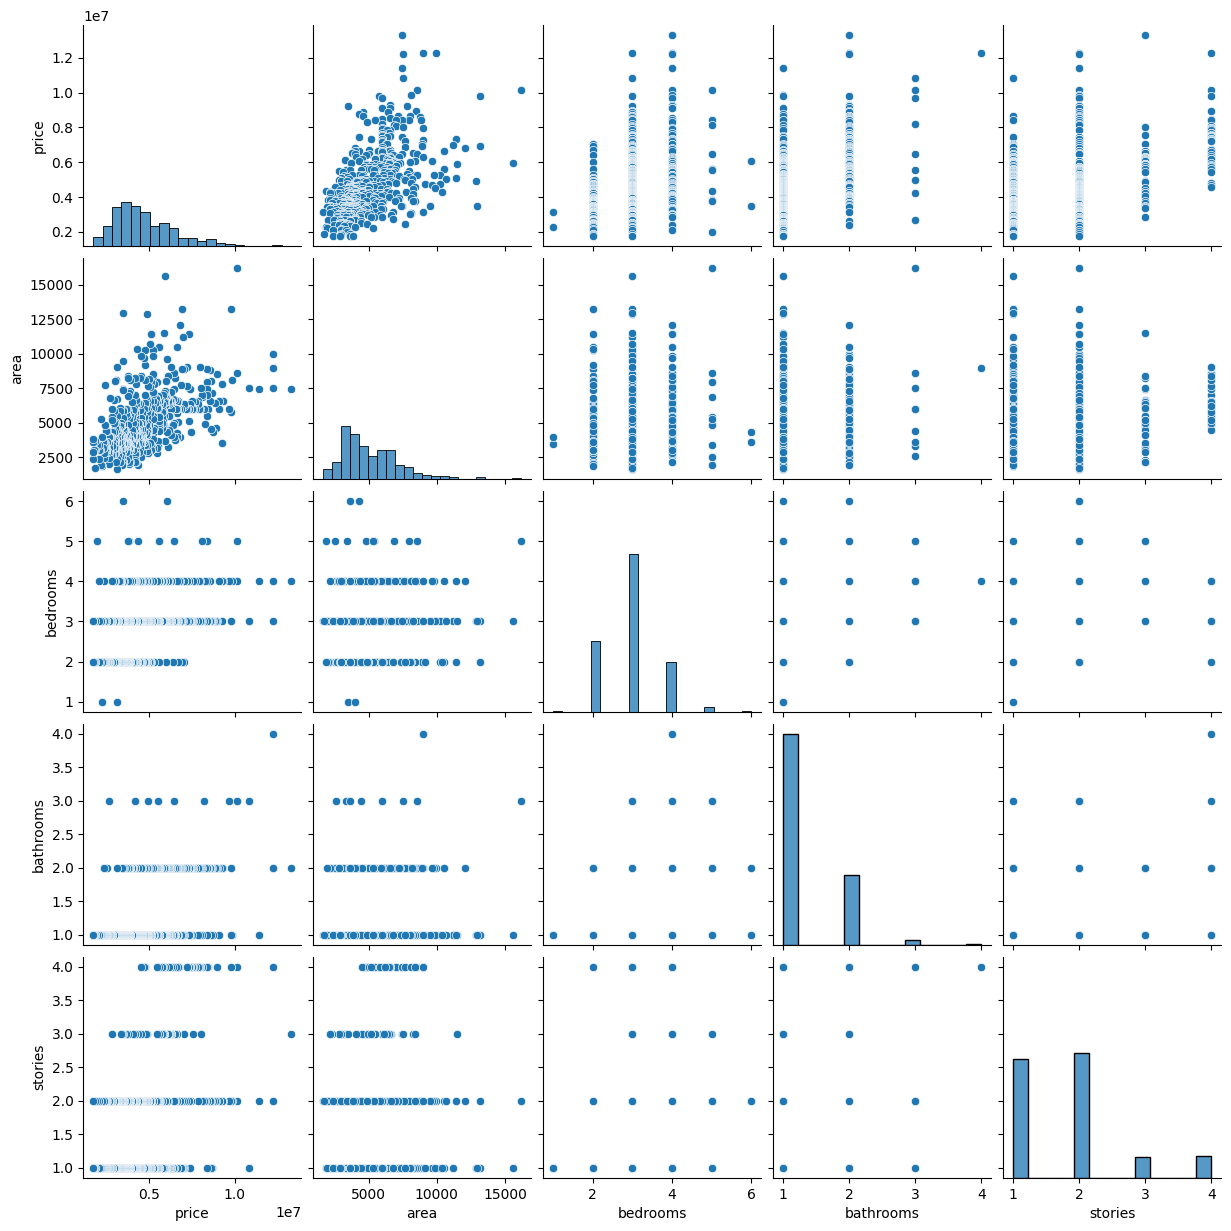

In [21]:
sns.pairplot(df, vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories'])
plt.show()


**4. Perform descriptive statistics on the dataset.**

In [20]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**5. Check for Missing values and deal with them**

In [22]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

**6. Find the outliers and replace them outliers**

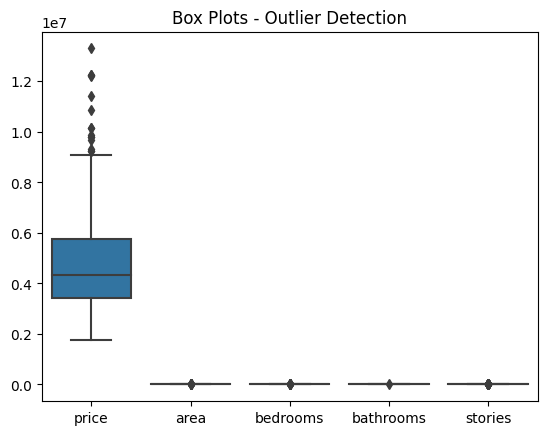

In [25]:
sns.boxplot(data=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.title('Box Plots - Outlier Detection')
plt.show()
Q1 = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].quantile(0.25)
Q3 = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df.copy()
outlier_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
for col in outlier_columns:
    lower_bound = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper_bound = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    df_cleaned[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])



**7. Check for Categorical columns and perform encoding.**

In [26]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


**8. Split the data into dependent and independent variables.** 

In [27]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

**9. Scale the independent variables**

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**10. Split the data into training and testing**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**11. Build the Model**

In [30]:
model = LinearRegression()


**12. Train the Model**

In [31]:
model.fit(X_train, y_train)

LinearRegression()

**13. Test the Model**

In [32]:
y_pred = model.predict(X_test)

**14. Measure the performance using Metrics.**

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1837637189871.707
R-squared: 0.6364404686639462
